# Milestone 2

The aim of this notebook is first preprocess the data and then analyse the final output. 
In order to run the notebook successfully, start with the [README](../data/README.md).

## Imports

In [189]:
# add root path to system path
import sys
sys.path.append('../')

In [190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.helpers import get_list_from_string_dict

## 1. Preprocessing

We care about 3 different datasets: `movie_metadata`, `plot_summaries`, `imdb_ratings`.

### 1.1 Movie Metadata

In [191]:
# specify the column names 
column_names = [
    'wikipedia_id', 'freebase_id', 'name', 'release_date', 
    'box_office_revenue', 'runtime', 'languages', 'countries', 'genres'
]
movie_metadata_df = pd.read_table('../data/raw/movie.metadata.tsv', names=column_names)
print(movie_metadata_df.shape)
movie_metadata_df.head(5)

(81741, 9)


,wikipedia_id,freebase_id,name,release_date,box_office_revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


Few things come up first that needs to be done:
1. release date has inconsistent formatting -> let's use only year
2. we don't need box-office revenue and runtime for the analysis -> let's drop them
3. languages, countries and genres have inconvenient formatting -> let's fix that

#### 1.1.1 Year

In [192]:
# let's first check how many missing values do we have in release date
missing_perc_date = movie_metadata_df.release_date.isna().sum() / movie_metadata_df.shape[0] * 100
print(f'We have missing year for {round(missing_perc_date, 1)}% of data')

We have missing year for 8.4% of data


In [193]:
# let's now convert string to date
movie_metadata_df['release_year'] = pd.to_datetime(movie_metadata_df['release_date'], errors='coerce')

# remove the original column
# plus there might be some with inconsistent formatting in the newly created column
movie_metadata_df.drop(columns='release_date', inplace=True)
movie_metadata_df.dropna(subset=['release_year'], inplace=True)

# and now convert it to year as integer
movie_metadata_df['release_year'] = movie_metadata_df['release_year'].dt.year.astype(int)

movie_metadata_df.head(5)

,wikipedia_id,freebase_id,name,box_office_revenue,runtime,languages,countries,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000
2,28463795,/m/0crgdbh,Brun bitter,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988
3,9363483,/m/0285_cd,White Of The Eye,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987
4,261236,/m/01mrr1,A Woman in Flames,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983


#### 1.1.2 Unnecessary columns

In [194]:
# let's remove unnecessary columns
movie_metadata_df.drop(columns=['box_office_revenue', 'runtime'], inplace=True)

#### 1.1.3 Inconvenient Formatting

In [195]:
# convert columns genres, languages and countries to list of strings
movie_metadata_df['genres'] = movie_metadata_df.genres.apply(get_list_from_string_dict)
movie_metadata_df['languages'] = movie_metadata_df.languages.apply(get_list_from_string_dict)
movie_metadata_df['countries'] = movie_metadata_df.countries.apply(get_list_from_string_dict)

movie_metadata_df.head(5)

,wikipedia_id,freebase_id,name,languages,countries,genres,release_year
0,975900,/m/03vyhn,Ghosts of Mars,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...",2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,[English Language],[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]",2000
2,28463795,/m/0crgdbh,Brun bitter,[Norwegian Language],[Norway],"[Crime Fiction, Drama]",1988
3,9363483,/m/0285_cd,White Of The Eye,[English Language],[United Kingdom],"[Thriller, Erotic thriller, Psychological thri...",1987
4,261236,/m/01mrr1,A Woman in Flames,[German Language],[Germany],[Drama],1983


In [196]:
# let's now check the null-s 
print("Number of rows {}:".format(movie_metadata_df.shape[0]))
(~movie_metadata_df.astype(bool)).sum()

Number of rows 74838:


wikipedia_id        0
freebase_id         0
name                0
languages       10009
countries        5228
genres           1762
release_year        0
dtype: int64

Such method was used for checking nulls because `languages`, `countries` and `genres` might simply be empty lists.
As languages nor countries are in the principal role in the following analysis (we might not use them at all), 
we can keep them as they are for now and decide the strategy if need be.

### 1.2 Plot Summaries    

In [197]:
# let's read the file
plot_column_names = ['wikipedia_id', 'plot']
plot_df = pd.read_csv('../data/raw/plot_summaries.txt', sep="\t", names=plot_column_names)
print(plot_df.shape)
plot_df.head(5)

(42303, 2)


,wikipedia_id,plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [198]:
# let's check nan-s here
plot_df.isna().sum()

wikipedia_id    0
plot            0
dtype: int64

In [199]:
# check if any of the columns is not empty string in plots
empty_plots = (plot_df['plot'].apply(len) == 0).sum()
print(f'We have {empty_plots} plots that have empty plot description.')

We have 0 plots that have empty plot description.


### 1.3 IMDB Ratings

For IMDB, we need two files `title.ratings.tsv` and `title.basics.tsv`.

In [200]:
imdb_basics_df = pd.read_csv('../data/raw/title.basics.tsv', sep='\t', low_memory=False)
print(imdb_basics_df.shape)
imdb_basics_df.head(5)

(10306126, 9)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [201]:
imdb_ratings_df = pd.read_csv('../data/raw/title.ratings.tsv', sep='\t')
print(imdb_ratings_df.shape)
imdb_ratings_df.head(5)

(1367781, 3)


,tconst,averageRating,numVotes
0,tt0000001,5.7,2006
1,tt0000002,5.8,269
2,tt0000003,6.5,1909
3,tt0000004,5.5,178
4,tt0000005,6.2,2689


In order to add ratings, we need first to merge two IMDB df-s.

In [202]:
# let's first keep only necessary titles
imdb_basics_df = imdb_basics_df[imdb_basics_df.titleType == 'movie']

# let's keep only necessary columns
imdb_basics_df = imdb_basics_df[['tconst', 'originalTitle', 'startYear']]

In [203]:
# now we can merge the two
imdb_df = pd.merge(imdb_basics_df, imdb_ratings_df, on='tconst', how='inner')
print(imdb_df.shape)
imdb_df.head(5)

(299786, 5)


,tconst,originalTitle,startYear,averageRating,numVotes
0,tt0000009,Miss Jerry,1894,5.3,207
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,5.3,484
2,tt0000502,Bohemios,1905,4.1,15
3,tt0000574,The Story of the Kelly Gang,1906,6.0,855
4,tt0000591,L'enfant prodigue,1907,5.0,21


In [204]:
# we don't need tconst anymore, let's drop it
imdb_df.drop(columns='tconst', inplace=True)

# let's rename the columns to avoid camelcase and sync with other df-s
imdb_df.rename(
    columns={
        'originalTitle': 'name',
        'startYear': 'release_year',
        'averageRating': 'rating',
        'numVotes': 'num_votes'
    },
    inplace=True
)

# let's fix some dtypes
imdb_df.release_year = pd.to_numeric(imdb_df.release_year, errors='coerce', downcast='integer')
imdb_df.dropna(subset='release_year', inplace=True)

imdb_df.name = imdb_df.name.astype(str)

In [205]:
# let's check nulls per column
imdb_df.isna().sum()

name            0
release_year    0
rating          0
num_votes       0
dtype: int64

### 1.4 Merge Datasets

Now that we have all the datasets preprocessed, let's merge them.

In [206]:
# merge plots with metadata
movies_plots_df = pd.merge(plot_df, movie_metadata_df, on='wikipedia_id', how='inner')
movies_plots_df.head(5)

,wikipedia_id,plot,freebase_id,name,languages,countries,genres,release_year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",/m/076w2lb,Taxi Blues,[Russian Language],"[France, Soviet Union, Russia]","[Drama, World cinema]",1990
1,31186339,The nation of Panem consists of a wealthy Capi...,/m/0gkz15s,The Hunger Games,[English Language],[United States of America],"[Action/Adventure, Science Fiction, Action, Dr...",2012
2,20663735,Poovalli Induchoodan is sentenced for six yea...,/m/051zjwb,Narasimham,[Malayalam Language],[India],"[Musical, Action, Drama, Bollywood]",2000
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",/m/06xtz3,The Lemon Drop Kid,[English Language],[United States of America],"[Screwball comedy, Comedy]",1951
4,595909,Seventh-day Adventist Church pastor Michael Ch...,/m/02tqm5,A Cry in the Dark,[English Language],"[United States of America, Australia, New Zeal...","[Crime Fiction, Drama, Docudrama, World cinema...",1988


Merging with IMDB requires a bit more manual work. Since we need to use the year and movie name for merging, 
we first need to check if there are any duplicates.

In [207]:
# checking movies-plots df for duplicates in merge keys
movies_plots_df.duplicated(subset=['name', 'release_year']).sum()

41

It turns out there are. Let's use the first occurrence.

In [208]:
movies_plots_df.drop_duplicates(subset=['name', 'release_year'], inplace=True)

In [209]:
# checking imdb df for duplicates in merge keys
imdb_df.duplicated(subset=['name', 'release_year']).sum()

1051

We have duplicates in the IMDB dataset as well. Let's use the same approach as before.

In [210]:
imdb_df.drop_duplicates(subset=['name', 'release_year'], inplace=True)

In [211]:
# let's create lowercase titles for merging
movies_plots_df['name_lowercase'] = movies_plots_df.name.str.lower()
imdb_df['name_lowercase'] = imdb_df.name.str.lower()

# let's now merge
final_df = pd.merge(imdb_df, movies_plots_df, on=['name_lowercase', 'release_year'], how='inner')

# and now deal with lowecase names
final_df.drop(columns=['name_lowercase', 'name_y'], inplace=True)
final_df.rename(columns={'name_x': 'name'}, inplace=True)

print(final_df.shape)
final_df.head(5)

(22558, 10)


,name,release_year,rating,num_votes,wikipedia_id,plot,freebase_id,languages,countries,genres
0,Miss Jerry,1894.0,5.3,207,10109752,After finding out that her father is suffering...,/m/02q23xk,[Silent film],[United States of America],"[Short Film, Silent film, Indie, Black-and-white]"
1,The Corbett-Fitzsimmons Fight,1897.0,5.3,484,28703057,The film no longer exists in its entirety; how...,/m/0czdh_n,[],[],[Sports]
2,The Story of the Kelly Gang,1906.0,6.0,855,142995,The Story of the Kelly Gangs tone is of sorrow...,/m/0120y4,[English Language],[Australia],"[Crime Fiction, Silent film, Biography, Indie,..."
3,Robbery Under Arms,1907.0,4.3,25,32986669,Key scenes of the film included the branding o...,/m/04p7yxx,[Silent film],[Australia],"[Silent film, Drama]"
4,"Captain Midnight, the Bush King",1911.0,5.4,18,32987200,Edgar Dalimore is the son of wealthy station o...,/m/0h569x9,[Silent film],[],[Silent film]


We now have finished with preprocessing and have 21767 rows with all the necessary data.

## 2. Analysis

Let's now understand the nature of our data and start from descriptive statistics.

In [212]:
final_df.describe()

,release_year,rating,num_votes,wikipedia_id
count,22558.000000,22558.000000,2.255800e+04,2.255800e+04
mean,1982.337929,6.180242,2.650873e+04,1.312404e+07
std,25.264872,1.112769,1.031431e+05,1.094010e+07
min,1894.000000,1.200000,5.000000e+00,3.217000e+03
25%,1963.000000,5.600000,3.630000e+02,3.077303e+06
50%,1990.000000,6.300000,1.674000e+03,1.009166e+07
75%,2004.000000,6.900000,9.252750e+03,2.300214e+07
max,2014.000000,9.700000,2.816967e+06,3.749236e+07


### 2.1 Distributions

<AxesSubplot:xlabel='release_year', ylabel='Count'>

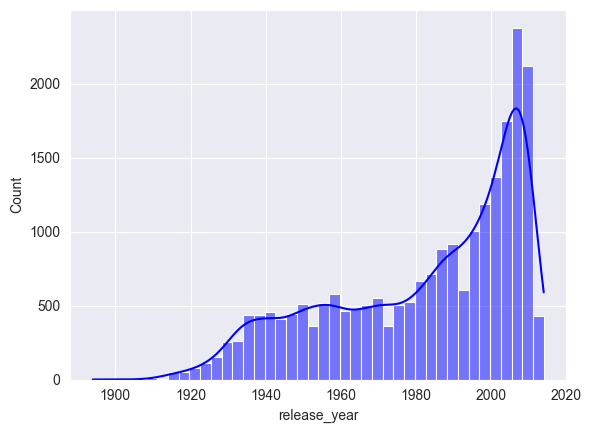

In [213]:
# plot the movie counts by year
sns.histplot(final_df.release_year, kde=True, color='blue', label='treated')

Considering the distribution of the histogram, we might shift out focus for the last 40 years since there's more available data.

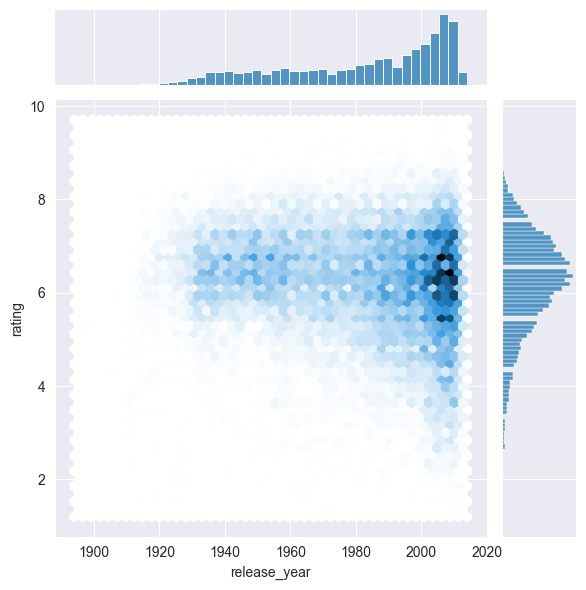

In [214]:
# let's see compare the IMDB rating with the year
sns.jointplot(data=final_df, x='release_year', y='rating', kind='hex')

As we can see, ratings are almost normally distributed. Additionally, higher spread in ratings also comes from the recent decades.

### 2.2 Genre analysis

As our work will highly depend on the genres, let's take a look which are the most common and/or most rated.

In [215]:
# let's get the list of all genres
unique_genres = final_df.genres.explode().unique()
print("Number of genres: {}".format(len(unique_genres)))

Number of genres: 348


Text(0.5, 1.0, 'Number of movies by number of genres')

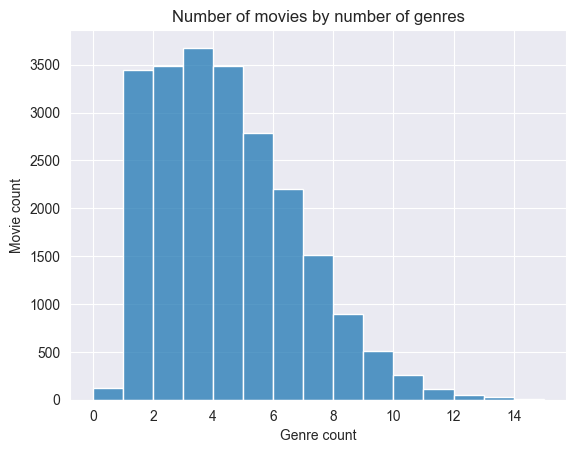

In [216]:
# let's now look how many genres in general the movies have
num_genres = final_df.genres.apply(lambda x: len(x)).rename('genre_count')
ax = sns.histplot(data=num_genres, bins=np.arange(0, 16, 1))

plt.xlabel('Genre count')
plt.ylabel('Movie count')
plt.title('Number of movies by number of genres')

It turns out the most of the movies have 1-5 genres, but there might be as many as 14.

Text(0.5, 1.0, 'Number of movies by genre')

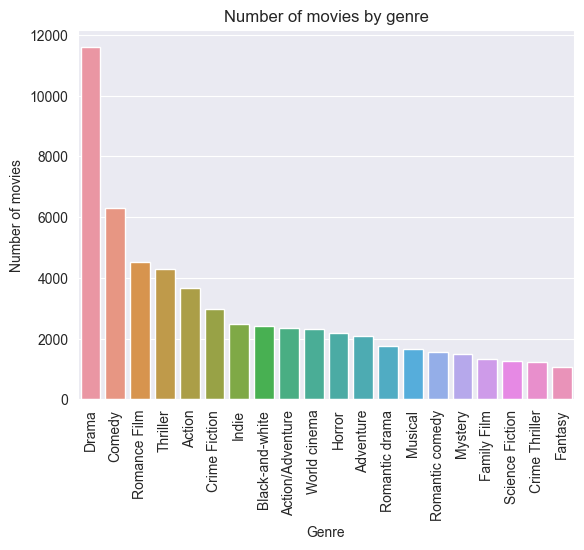

In [217]:
# let's see what are the most popular genres
count_min = 1000
genre_count = final_df.genres.explode().value_counts()
popular_genres = genre_count[genre_count > count_min]

# plot the count of each genre
sns.barplot(x=popular_genres.index, y=popular_genres.values)

plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.title('Number of movies by genre')

In [218]:
# and finally, let's see if there's any pattern in genre and its rating
lst_rating = []
for genre in popular_genres.index:
    lst_rating.append(final_df[final_df.genres.apply(lambda genres: genre in genres)].rating.tolist())

Text(0.5, 1.0, 'IMDb Rating by Genre')

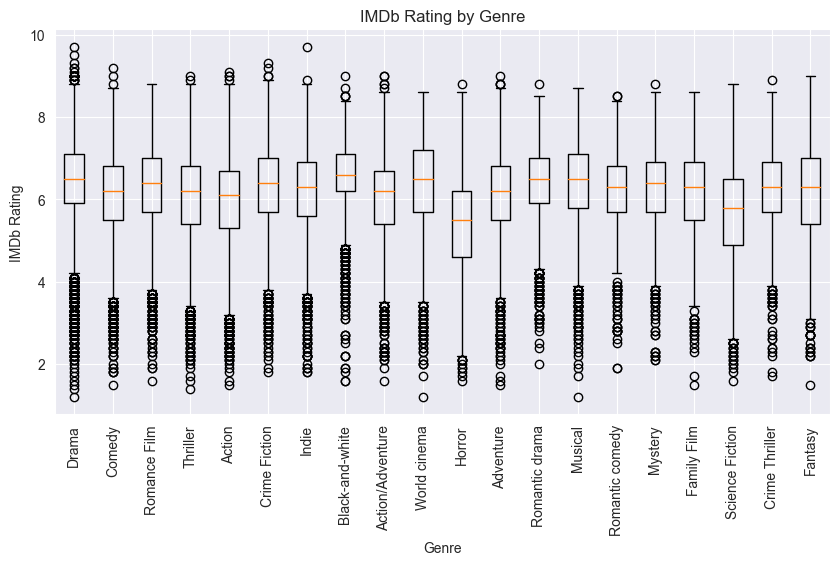

In [219]:
plt.figure(figsize=(10, 5))
plt.boxplot(lst_rating, labels=popular_genres.index)
plt.xticks(rotation=90)

plt.xlabel('Genre')
plt.ylabel('IMDb Rating')
plt.title('IMDb Rating by Genre')

As can be seen from the chart, there are no clear patterns regarding the rating and the genre, which is as expected.
Last, but not least, let's save the preprocessed csv. This concludes our analysis and we can now move on to embedding models. 

In [220]:
final_df.to_csv('../data/processed/preprocessed.csv')